### K - Means Clustering

#### 1. Import Libraries

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler , MinMaxScaler
from sklearn.cluster import KMeans

In [41]:
import warnings
warnings.filterwarnings("ignore")


#### 2. Load Dataset

In [17]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


#### 3. Data Preprocessing

In [18]:
print(df.info())
print(df.describe())
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000    

In [19]:
# check missing values
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [20]:
# Drop the column which is not required for our analysis
df.drop("CustomerID",axis=1,inplace=True)
# axis refers to column and inplace says to drop the column completely
# To drop both at once we use df.drop(columns={"CustomerID","Gender"},inplace=True)

In [21]:
df.drop("Gender",axis=1,inplace=True)

In [22]:
df.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


#### 4. EDA

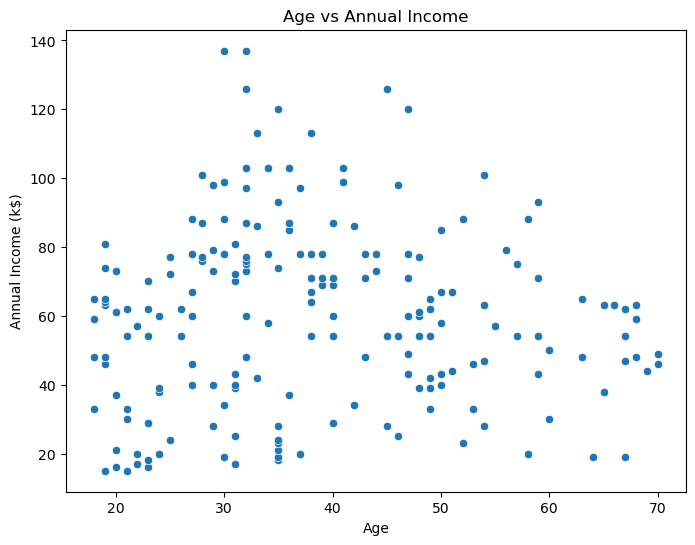

In [25]:
# Display age and annual income with scatter plot
plt.figure(figsize=(8,6))
sns.scatterplot(x="Age",y="Annual Income (k$)",data=df)
plt.title("Age vs Annual Income")
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
plt.show()


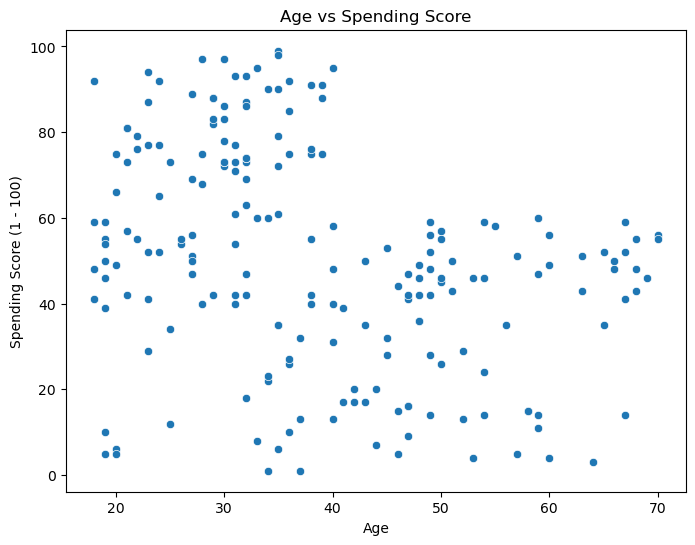

In [27]:
# display age and spending score scatter plot
plt.figure(figsize=(8,6))
sns.scatterplot(x="Age",y="Spending Score (1-100)",data=df)
plt.title("Age vs Spending Score")
plt.xlabel("Age")
plt.ylabel("Spending Score (1 - 100)")
plt.show()

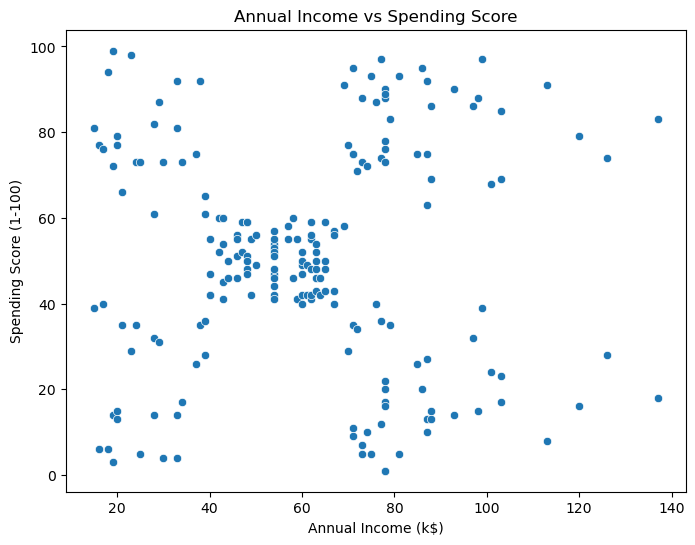

In [29]:
# display Annual Income and spending score scatter plot
plt.figure(figsize=(8,6))
sns.scatterplot(x="Annual Income (k$)",y="Spending Score (1-100)",data=df)
plt.title("Annual Income vs Spending Score")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.show()

#### 5. Feature Engineering


In [ ]:
# Find the skewness of the data and check whether the data is skewed or not and which type of skewness is present
print("Skewness of Age :",(df["Age"].skew()))
print("Skewness of Annual Income :",(df['Annual Income (k$)'].skew()))
print("Skewness of Spending Score :",(df['Spending Score (1-100)'].skew()))

Skewness of Age : 0.48556885096681657
Skewness of Annual Income : 0.3218425498619055
Skewness of Spending Score : -0.047220201374263374


In [33]:
# display skewness name either it is normal,right skewed,left skewed
def skewness_name(skewness) :
    if skewness > 0 :
        return "Right Skewed"
    elif skewness < 0 :
        return "Left Skewed"
    else :
        return "Normal"

print("Skewness of Age :",skewness_name(df["Age"].skew()))
print("Skewness of Annual Income :",skewness_name(df['Annual Income (k$)'].skew()))
print("Skewness of Spending Score :",skewness_name(df['Spending Score (1-100)'].skew()))  

Skewness of Age : Right Skewed
Skewness of Annual Income : Right Skewed
Skewness of Spending Score : Left Skewed


If there is a skewed value then we use Standardization else we use Normalization

In [34]:
# Scaling the data
scaler = StandardScaler()

scaled_data = scaler.fit_transform(df)
df = pd.DataFrame(scaled_data , columns = df.columns)
df.head() 

,Age,Annual Income (k$),Spending Score (1-100)
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


#### 6. Train K - Means model

In [42]:
kmeans = KMeans(n_clusters = 5, random_state = 42)
kmeans.fit(df)
df["Cluster"] = kmeans.labels_
df.head()

,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,-1.424569,-1.738999,-0.434801,2
1,-1.281035,-1.738999,1.195704,2
2,-1.352802,-1.700830,-1.715913,4
3,-1.137502,-1.700830,1.040418,2
4,-0.563369,-1.662660,-0.395980,2


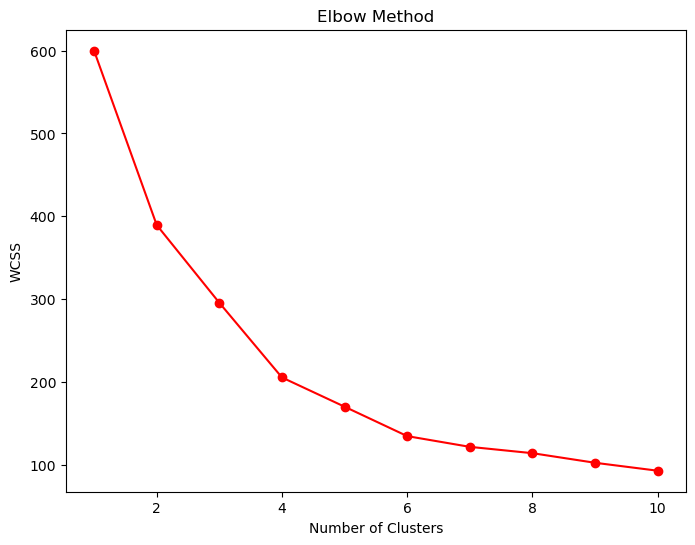

In [44]:
# Check with Elbow Method
wcss = []
for i in range(1 , 11) :
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df.drop("Cluster" , axis=1))
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,6))
plt.plot(range(1,11), wcss, marker = 'o', color = 'red')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

Text(0, 0.5, 'Annual Income (k$)')

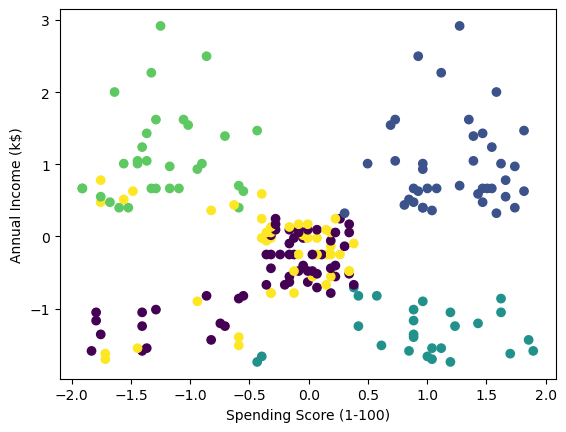

In [45]:
# display the clusters
plt.scatter(df['Spending Score (1-100)'],df['Annual Income (k$)'],c=df["Cluster"])
plt.xlabel("Spending Score (1-100)")
plt.ylabel("Annual Income (k$)")

In [46]:
df.to_csv("Clustered_Mall_Customer.csv",index=False)

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [48]:
df1 = pd.read_csv("Clustered_Mall_Customer.csv")

In [50]:
X = df.drop("Cluster", axis=1)
y = df["Cluster"]

In [53]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [58]:
dt = DecisionTreeClassifier(
    criterion="gini",
    random_state=42
)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [66]:
y_pred = dt.predict(X_test)
joblib.dump(dt, "kmeans.pkl")

['kmeans.pkl']

In [61]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:\n")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.925

Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        12
           1       0.89      1.00      0.94         8
           2       1.00      0.80      0.89         5
           3       1.00      1.00      1.00         6
           4       0.80      0.89      0.84         9

    accuracy                           0.93        40
   macro avg       0.94      0.92      0.93        40
weighted avg       0.93      0.93      0.93        40

Confusion Matrix:

[[11  0  0  0  1]
 [ 0  8  0  0  0]
 [ 0  0  4  0  1]
 [ 0  0  0  6  0]
 [ 0  1  0  0  8]]


In [67]:
import joblib

model = joblib.load("kmeans.pkl")
print("Model loaded successfully!")

Model loaded successfully!
